In [1]:
## scrupt to compare Duveiller dataset directly to cesm and mpiesm data using the concept of sensitivities
from func_utils import *
#make flags to change functionality of script
case_flag='crop-frst' ##currently only able to handle crop-ctl or frst-ctl
flag_maps=0
flag_submodel_cesm='atm'
flag_obs='line'   ##shade or line
min_lcc=0.0
flag_sens=False
plot_lims=[-2,6]
smth=2
print(flag_submodel_cesm)
#read in model data 
plt.rcParams['figure.figsize'] = [5, 8]

outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'+case_flag+'/'
if flag_submodel_cesm=='lnd':
    fn_cesm='Lmon/TG/TG_'+case_flag+'_cesm_ensmean_signal-separated.nc'
    var_cesm='TG'
    print(var_cesm)
elif flag_submodel_cesm=='atm':
    fn_cesm='Amon/TS/TS_'+case_flag+'_cesm_ensmean_signal-separated.nc'
    var_cesm='TS'
ds_cesm=xr.open_dataset(outdir+fn_cesm)
da_cesm_local=ds_cesm[var_cesm+'_local']
da_cesm_nonlocal=ds_cesm[var_cesm+'_nonlocal']
da_cesm_total=ds_cesm[var_cesm+'_total']

fn_mpiesm='Amon/ts/ts_'+case_flag+'_mpiesm_ensmean_signal-separated.nc'
ds_mpiesm=xr.open_dataset(outdir+fn_mpiesm)
da_mpiesm_local=ds_mpiesm['ts_local']
da_mpiesm_nonlocal=ds_mpiesm['ts_nonlocal']
da_mpiesm_total=ds_mpiesm['ts_total']
    
fn_ecearth='Lmon/stl1/interped_stl1_'+case_flag+'_ecearth_ensmean_signal-separated.nc'
ds_ecearth=xr.open_dataset(outdir+fn_ecearth)
da_ecearth_local=ds_ecearth['stl1_local']
da_ecearth_nonlocal=ds_ecearth['stl1_nonlocal']
da_ecearth_total=ds_ecearth['stl1_total']

# read in observational data
outdir_obs = '/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/'
fn_obs='LSTmean.nc'
ds_obs=xr.open_dataset(outdir_obs+fn_obs)
da_obs=ds_obs['Delta_LSTday_ext']
fn_obs_li='li_TS.nc'
ds_obs_li=xr.open_dataset(outdir_obs+fn_obs_li)
da_obs_li=ds_obs_li['Tmean_li']
fn_obs_alkama='alkama_TS.nc'
ds_obs_alkama=xr.open_dataset(outdir_obs+fn_obs_alkama)
da_obs_alkama=ds_obs_alkama['Tmean_alkama']
fn_obs_bright='bright_TS_cesm.nc'
ds_obs_bright=xr.open_dataset(outdir_obs+fn_obs_bright)
da_obs_bright=ds_obs_bright['Tmean_bright']
fn_obs_bright2='bright_TS_mpiesm.nc'
ds_obs_bright2=xr.open_dataset(outdir_obs+fn_obs_bright)
da_obs_bright2=ds_obs_bright2['Tmean_bright']
#convert model data to sensitivities
ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_cesm.nc')
da_lcc=ds_lu['defor']
da_lcc_cesm=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
ds_lu=xr.open_dataset(outdir_obs+case_flag+'_defor_mpiesm.nc')
da_lcc=ds_lu['defor']
da_lcc=xr.where(da_lcc<min_lcc,np.nan,da_lcc)
da_lcc_mpiesm=da_lcc.sortby(["lat"], ascending=True)

if flag_sens==False:
    da_sens_local_cesm=da_cesm_local.mean('time')[:]
    da_sens_local_mpiesm=da_mpiesm_local.mean('time')[:]
    da_sens_nonlocal_cesm=da_cesm_nonlocal.mean('time')[:]
    da_sens_nonlocal_mpiesm=da_mpiesm_nonlocal.mean('time')[:]
    da_sens_total_cesm=da_cesm_total.mean('time')[:]
    da_sens_total_mpiesm=da_mpiesm_total.mean('time')[:]
    da_sens_local_ecearth=da_ecearth_local[:]
    da_sens_nonlocal_ecearth=da_ecearth_nonlocal[:]
    da_sens_total_ecearth=da_ecearth_total[:]
else:
    da_sens_local_cesm=da_cesm_local.mean('time')[:]/da_lcc_cesm.values
    da_sens_local_mpiesm=da_mpiesm_local.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_nonlocal_cesm=da_cesm_nonlocal.mean('time')[:]/da_lcc_cesm.values
    da_sens_nonlocal_mpiesm=da_mpiesm_nonlocal.mean('time')[:]/da_lcc_mpiesm.values
    da_sens_total_cesm=da_cesm_total.mean('time')[:]/da_lcc_cesm.values
    da_sens_total_mpiesm=da_mpiesm_total.mean('time')[:]/da_lcc_mpiesm.values
#plot maps of sensitivity and latitudinal plot
if flag_maps==1:
    for da in [da_obs,da_obs_li,da_obs_alkama,da_obs_bright,da_obs_bright2,da_sens_local_cesm,da_sens_local_mpiesm,da_sens_local_ecearth]:
        #plot the maps
        cmap = 'coolwarm'
        name = da.name
        projection = ccrs.PlateCarree()
        f, ax = plt.subplots(1,1,subplot_kw={'projection':projection})
        ax.coastlines()
        h=da.plot(ax=ax, cmap=cmap, vmin=-2, vmax=2, add_colorbar=False)
        cbar   = f.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = 'degrees C',pad = 0.05,extend='both')
        ax.set_title(name)
        ax.set_aspect('auto')
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())
        plt.show()


atm


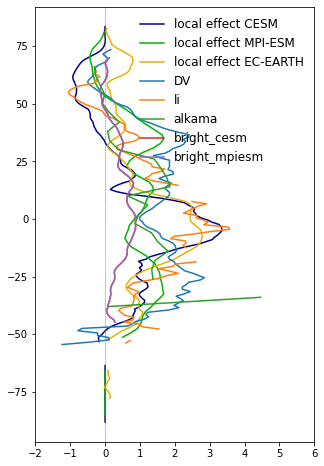

In [2]:
#plot the lat plot

f, ax = plt.subplots(1,1)
da_obs=da_obs.sortby(["lat"], ascending=True)
i=0
#list_da=[da_sens_local_cesm,da_sens_nonlocal_cesm,da_sens_total_cesm,da_sens_local_mpiesm,da_sens_nonlocal_mpiesm,da_sens_total_mpiesm]
#label_list=['Local effect cesm','nonlocal effect cesm','total effect cesm','local effect mpiesm','nonlocal effect mpiesm','total effect mpiesm']
#list_da=[da_sens_local_cesm,da_sens_total_cesm,da_sens_local_mpiesm,da_sens_total_mpiesm]
list_da=[da_sens_local_cesm,da_sens_local_mpiesm,da_sens_local_ecearth]
label_list=['local effect CESM','local effect MPI-ESM','local effect EC-EARTH']
color_list=[(0,0,0.54),(0,0.7,0),(0.9,0.7,0)]
model_list=['cesm','mpiesm','ecearth']
for da in list_da:
    i=i+1
    da=da.sortby(["lat"], ascending=True)
    name=da.name
    da=mask_data(da,case_flag,model_list[i-1],'lnd')
    dalat=da.mean(dim='lon')
    #if flag_obs=='line':
    ax.plot(dalat.rolling(lat=int(smth*2),center=True).mean(),dalat.lat,label=label_list[i-1],color=color_list[i-1]) 
  #elif flag_obs=='shade':
        #ax.plot(dalat.lat,dalat.rolling(lat=3,center=True).mean(),label=label_list[i-1])  
if flag_obs=='line':
    dalatobs=da_obs.mean(dim='lon')
    ax.plot(dalatobs.mean('time').rolling(lat=int(smth),center=True).mean(),dalatobs.lat,label='DV')     
    dalatobs_li=da_obs_li.mean(dim='lon')*-1
    ax.plot(dalatobs_li.rolling(lat=int(smth*2),center=True).mean(),dalatobs_li.lat,label='li')  
    dalatobs_alkama=da_obs_alkama.mean(dim='lon')
    ax.plot(dalatobs_alkama.rolling(lat=int(smth/2),center=True).mean(),dalatobs_alkama.lat,label='alkama')  
    dalatobs_bright=da_obs_bright.mean(dim='lon')*-1
    ax.plot(dalatobs_bright.rolling(lat=int(smth*2),center=True).mean(),dalatobs_bright.lat,label='bright_cesm')  
    dalatobs_bright2=da_obs_bright2.mean(dim='lon')*-1
    ax.plot(dalatobs_bright2.rolling(lat=int(smth*2),center=True).mean(),dalatobs_bright2.lat,label='bright_mpiesm')  
    
    ax.set_xlim([plot_lims[0],plot_lims[1]])
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
elif flag_obs=='shade':
    dalatobs=da_obs.mean(dim='lon')
    dalatobs_li=da_obs_li.mean(dim='lon')*-1
    dalatobs_alkama=da_obs_alkama.mean(dim='lon')
    dalatobs_bright=da_obs_bright.mean(dim='lon')*-1
    dalatobs_bright2=da_obs_bright2.mean(dim='lon')*-1
    dalatobs_alkama=da_obs_alkama.interp({'lat':dalatobs.lat.values})
    dalatobs_alkama=dalatobs_alkama.mean(dim='lon')
    dalatobs_max=np.zeros([1,180])
    dalatobs_min=np.zeros([1,180])
    arr_max=np.zeros([5,len(dalatobs.lat)])
    arr_min=np.zeros([5,len(dalatobs.lat)])
    arr_max[0,:]=dalatobs.values
    arr_max[1,:]=dalatobs_li.values[::-1]
    arr_max[2,:]=dalatobs_bright.values[::-1]
    arr_max[3,:]=dalatobs_bright2.values[::-1]
    arr_max[4,:]=dalatobs_alkama.values
    arr_min=arr_max
    dalatobs_max=np.nanmax(arr_max,axis=0)
    dalatobs_min=np.nanmin(arr_max,axis=0)
    ax.fill_betweenx(dalatobs.lat,dalatobs_min, dalatobs_max, color='0.75',label='observational range',alpha=0.5)
    ax.set_xlim([plot_lims[0],plot_lims[1]])
    ax.set_ylim([-60,90])
    #ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    plt.ylabel('Latitude (°)',fontsize=15)
    plt.xlabel('Surface Temperature (K)',fontsize=15)

plt.legend(loc='upper right',prop={'size': 12},facecolor='white', framealpha=0)
plt.show()
f.savefig(outdir +'/'+ case_flag+ '_evaluation_sensitivity'+str(min_lcc)+'.png', dpi=300)
